In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get dataframes

exports_per_year = pd.read_csv('../output_data/exports_per_year.csv')
exports_per_year

,Unnamed: 0,year,location_code,hs_product_code,export_value
0,0,2004,Centro,112511,0.0
1,1,2004,Centro,112512,490.0
2,2,2004,Centro,114111,0.0
3,3,2004,Centro,114112,0.0
4,4,2004,Centro,114113,0.0
...,...,...,...,...,...
13967,13967,2019,Sur,813110,1661.0
13968,13968,2019,Sur,813120,1599.0
13969,13969,2019,Sur,813130,120.0
13970,13970,2019,Sur,813140,7.0


In [113]:
exports_per_year['hs_product_code_str']=exports_per_year['hs_product_code'].astype(str)

#exports_per_year.loc[exports_per_year['hs_product_code_str']]

sectors_SCIAN_dict={'Agriculture':'11','Mining':'21','Energy':'22',
                   'Building':'23','Manufacture':'3','Trades':('43','46'),
                   'Transport':'4','Services':('5','6','7','8')
                   }

exports_per_year.loc[exports_per_year['hs_product_code_str'].str.startswith('11', na=False)].values[0]

locations=exports_per_year['location_code'].unique()

years=exports_per_year['year'].unique()

year_loc_sector_val=[]
for year in years:
    for loc in locations:
        
        export_df=exports_per_year.loc[exports_per_year['year']==year].loc[exports_per_year['location_code']==loc]
        
        exp_val_tot=export_df['export_value'].values.sum()
        
        for sector in sectors_SCIAN_dict.keys():
            
            export_df_sector=export_df.loc[exports_per_year['hs_product_code_str'].str.startswith(sectors_SCIAN_dict[sector], na=False)]
            
            exp_val=export_df_sector['export_value'].values.sum()
            
            exp_per=exp_val/exp_val_tot*100
            
            
            year_loc_sector_val.append([year,loc,sector,exp_val,exp_per])
        
exports_per_sector=pd.DataFrame(year_loc_sector_val,columns=['year','location_code','sector','val','%val'])
exports_per_sector

,year,location_code,sector,val,%val
0,2004,Centro,Agriculture,698.0,0.061810
1,2004,Centro,Mining,1259.0,0.111488
2,2004,Centro,Energy,650.0,0.057559
3,2004,Centro,Building,3574.0,0.316487
4,2004,Centro,Manufacture,130456.0,11.552201
...,...,...,...,...,...
123,2019,Sur,Building,3520.0,0.317531
124,2019,Sur,Manufacture,176458.0,15.917882
125,2019,Sur,Trades,496457.0,44.784277
126,2019,Sur,Transport,501089.0,45.202120


In [112]:
exports_per_sector.loc[exports_per_sector['year']==year].loc[exports_per_sector['location_code']==loc]

,year,location_code,sector,val
120,2019,Sur,Agriculture,14055.0
121,2019,Sur,Mining,528.0
122,2019,Sur,Energy,1207.0
123,2019,Sur,Building,3520.0
124,2019,Sur,Manufacture,176458.0
125,2019,Sur,Trades,496457.0
126,2019,Sur,Transport,501089.0
127,2019,Sur,Services,411695.0


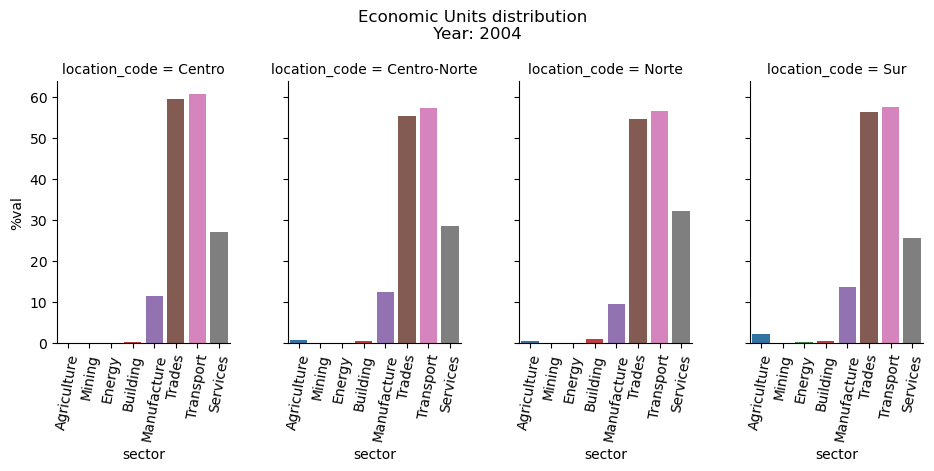

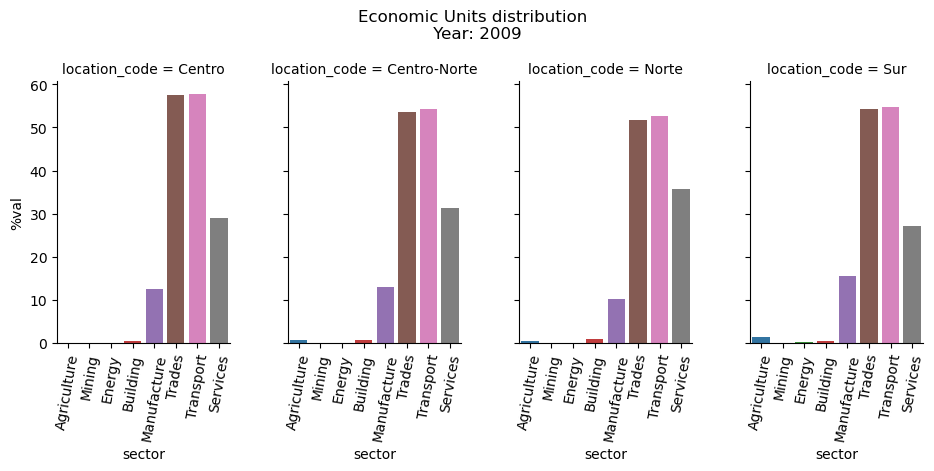

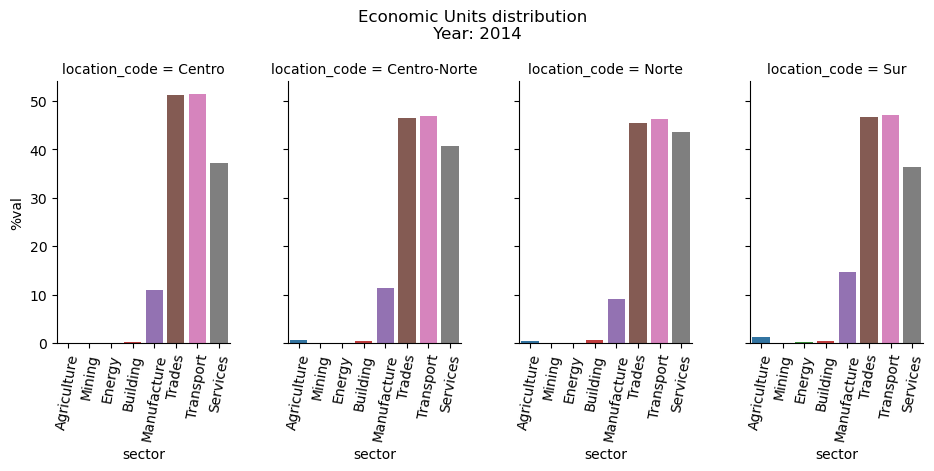

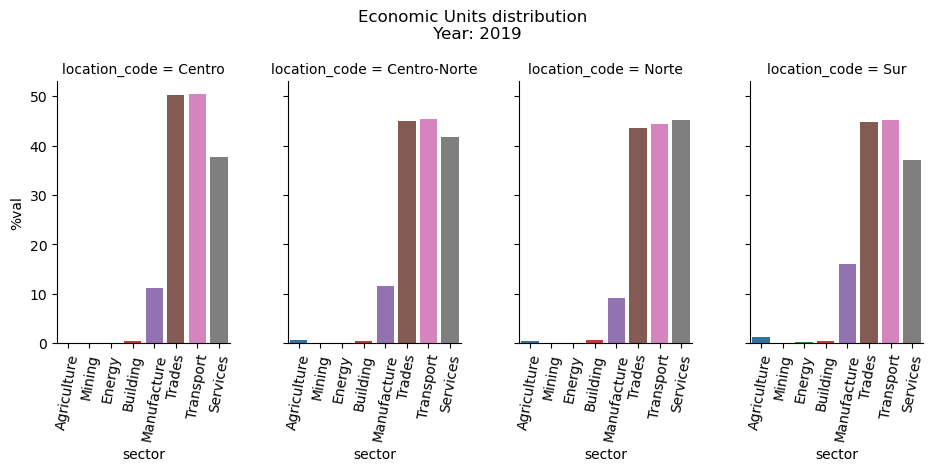

In [115]:
import seaborn as sns

for year in years:
    g=sns.catplot(
        data=exports_per_sector.loc[exports_per_sector['year']==year], x="sector", y="%val", col="location_code",row='year',
        kind="bar", height=4, aspect=.6,
    )
    g.set_xticklabels(rotation=80)

    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f'Economic Units distribution \n Year: {year}')
    plt.show()

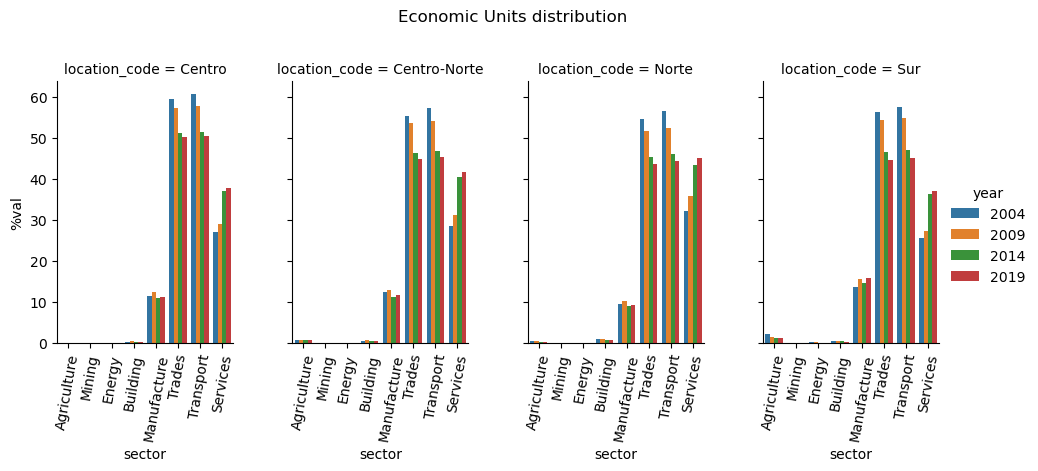

In [123]:
g=sns.catplot(
        data=exports_per_sector, x="sector", y="%val", col="location_code",hue='year',
        kind="bar", height=4, aspect=.6,
    )
g.set_xticklabels(rotation=80)

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle(f'Economic Units distribution')
plt.show()



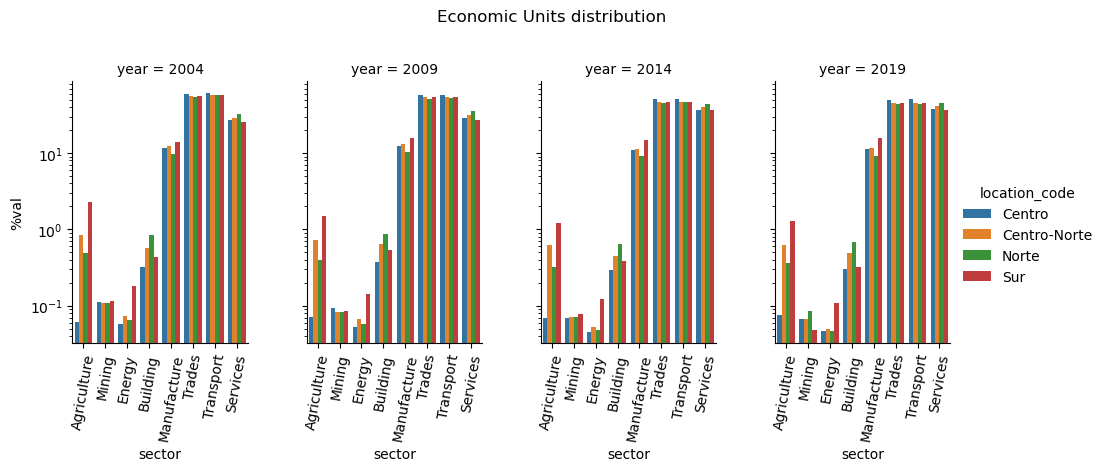

In [127]:
g=sns.catplot(
        data=exports_per_sector, x="sector", y="%val", col="year",hue='location_code',
        kind="bar", height=4, aspect=.6,
    )
g.set_xticklabels(rotation=80)

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle(f'Economic Units distribution')
plt.yscale('log')

plt.show()



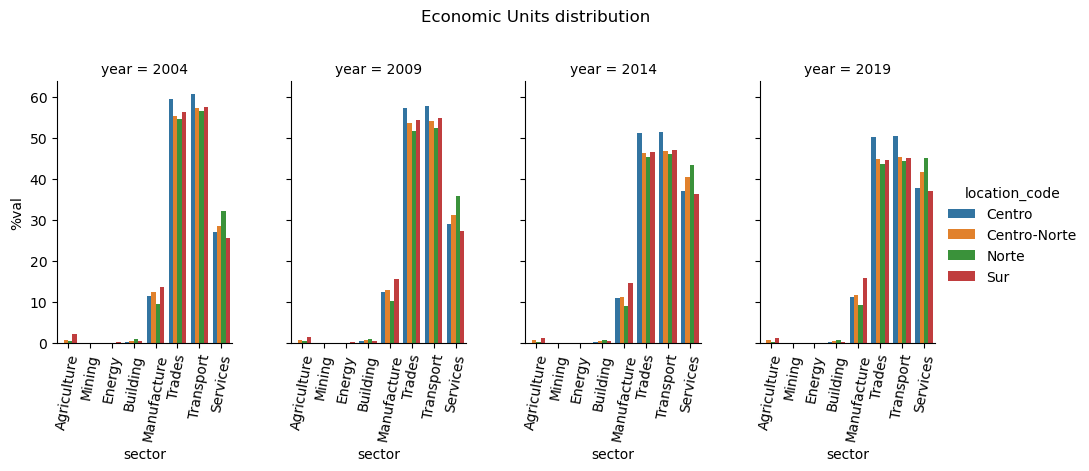

In [128]:
g=sns.catplot(
        data=exports_per_sector, x="sector", y="%val", col="year",hue='location_code',
        kind="bar", height=4, aspect=.6,
    )
g.set_xticklabels(rotation=80)

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle(f'Economic Units distribution')
#plt.yscale('log')

plt.show()

